<a href="https://colab.research.google.com/github/cristiana-e/Mnist-classificacao-imagem/blob/master/AI_Mnist_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando as bibliotecas necessárias

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
#importando a base de dados
mnist = tf.keras.datasets.mnist


In [ ]:
#dividindo a base em treino e teste para o modelo
(x_train, y_train), (x_test, y_test) = mnist.load_data()


### Conhecendo a dimensão dos dados

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

##Pré processamento dos dados

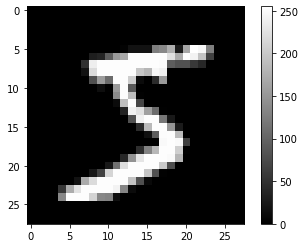

In [ ]:
# Visualizando a primeira imagem do conjunto de treinamento
plt.figure()
plt.imshow(x_train[0], cmap="gray") #outra forma de transformar a imagem em preto e branco é cmap=plt.cm.binary
plt.colorbar()
plt.show()

In [ ]:
#Normalizando os dados
x_train = x_train/255
x_test = x_test/255

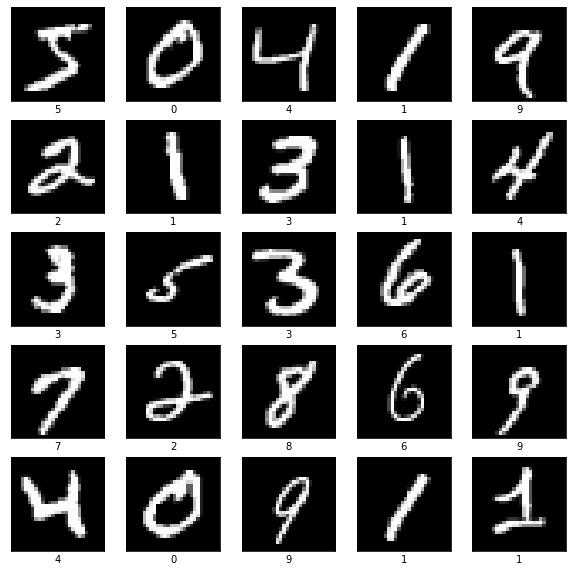

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  # imprimir a 25 primeiras imagens, em um quadro de 5 por 5 imagens
  plt.subplot(5,5,i+1)    # quantidade de imagens 5*5 (25)
  plt.imshow(x_train[i], cmap="gray")
  plt.grid(False)
  plt.xticks([]) #retira as grades do eixo x
  plt.yticks([]) #retira as grades do eixo y
  plt.xlabel(y_train[i]) # Mesmo índice da imagem
plt.show()

In [ ]:
class_names = ["0", "1", "2", "3", "4", "5",
               "6", "7", "8", "9"]

# Criando o modelo de Deep Learning

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), #Camada de input,flaten compacta os dados,ou seja tranforma um vetor multidimenssional em unidimenssional
                             tf.keras.layers.Dense(128, activation='relu'),#primeiro parametro será a quantidade de unidades 
                             tf.keras.layers.Dense(10) #Quantidade de classificados                    
])

In [ ]:
#Adam é um otimizador complexo e dos mais usado
#A ideia é ter um menor loss possível
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinando o modelo com o conjunto de treinamento

In [ ]:
#Treinando o modelo
model.fit(x=x_train, y=y_train, epochs=10) #10 é a quantidade de vezes que o modelo será treinado

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2596 - accuracy: 0.9260
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1149 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0797 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

##Testando o modelo

Testando o modelo no conjunto de teste

In [ ]:
#Avaliando as métricas
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Acurácia do modelo no conjunto de teste: {test_acc} e o erro:{test_loss}') 
#Apesar de termos ganhado um pouco mais em perda e reduzido um pouco a acurácia, é possível consideram o modelo como um bom modelo

313/313 [==============================] - 1s 1ms/step - loss: 0.0843 - accuracy: 0.9768
Acurácia do modelo no conjunto de teste: 0.9768000245094299 e o erro:0.08431494981050491


## Predições

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

In [ ]:
#matriz de probabilidades, deve observar a posição do maior valor de probabilidade
#neste caso esta na posição 8, logo o próximo passo deve retonar como resposta o número 7
predictions[0]

array([2.0335237e-07, 8.0734491e-13, 1.4599540e-08, 1.8274924e-06,
       2.6119474e-13, 9.9305793e-11, 1.3009479e-14, 9.9999678e-01,
       7.7754464e-07, 4.3405052e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

## Visualização gráfica das predições


In [ ]:
def plot_image(i, predictions, true_labels, images):
  true_label, img = true_labels[i], images[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap="gray")
  probability = np.max(predictions[i]) # retorna a maior probabilidade
  predicted_label = np.argmax(predictions[i]) # Retorna a label com maior probabilidade
  name_predicted_label = class_names[predicted_label] # Transformo a label numérica no nome do número

  plt.xlabel(f"{name_predicted_label}: {100*probability:2.0f}%")

In [ ]:
def plot_value_array(i, predictions, true_labels):
  true_label = true_labels[i]
  this_plot = plt.bar(range(10), predictions[i])
  plt.xticks(range(10))
  plt.yticks([])
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions[i]) # Retorna a label com maior probabilidade
  this_plot[predicted_label].set_color('blue')
  this_plot[true_label].set_color('red')

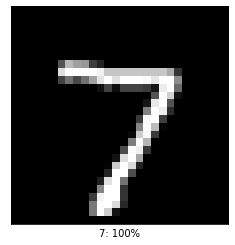

In [ ]:
plot_image(0, predictions, y_test, x_test)

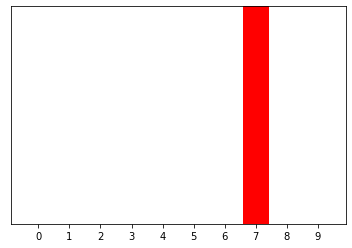

In [ ]:
plot_value_array(0, predictions, y_test)

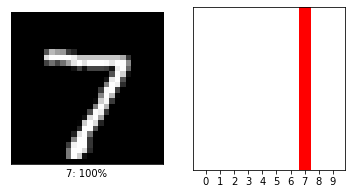

In [ ]:
# Testando as funções juntas para compor uma figura
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)
plt.show()

### Observando as predições para diversas imagens do conjunto de teste:


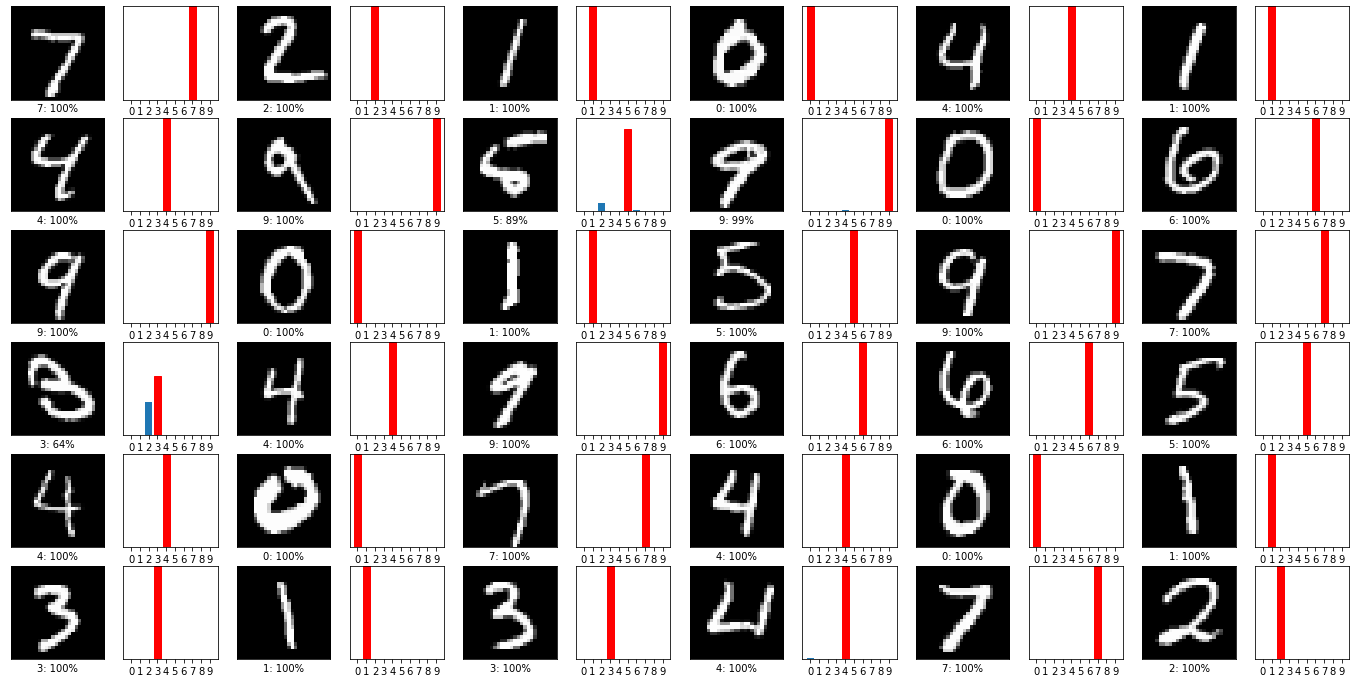

In [ ]:
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()